# Project Name:

<font size="4" ><span style="color:darkblue" >Data Science April Major Project Done By RamyaSri Sydu</font></span>

# Project Description:

<b>Problem statement:</b><br> Create a classification model to predict whether a person makes over $50k a
year<br>
<b>Context:</b><br> This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry 
Becker (Data Mining and Visualization, Silicon Graphics).<br>
<b>Dataset :</b><br>
https://drive.google.com/file/d/1nut9zTGHsHJruyKgDVG-iYGHhTNL4dEL/view?usp=sharing<br>
Details of features:<br>
The columns are described as follows:<br>
1) Age<br>
2) Workclass<br>
3) Fnlwgt<br>
4) Education<br>
5) education_num<br>
6) marital_status<br>
7) occupation<br>
8) relationship<br>
9) race<br>
10)sex<br>
11)capital_gain<br>
12)capital_loss<br>
13)hours_per_week<br>
14)native_country<br>
15)income<br>


In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np

In [2]:
#loading the DataSet
data = pd.read_csv("C:/Users/ramya/OneDrive/Documents/majorProjectDataSet.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<font size="4" ><span style="color:blue" >Rename the columns.</font></span>

In [3]:
data.columns = ['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
data.head(5)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<font size="4" ><span style="color:blue" >Remove handle null values (if any).</font></span>

In [4]:
data.head(5)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.describe()

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#checking weather dataset have null values
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
#checking weather dataset have duplicated values
data.duplicated().sum()

24

In [9]:
#Removing duplicate values
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [10]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
#find out numerical and categorical features for data set

numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
categorical_features=[feature for feature in  data.columns if  data[feature].dtype=='O' and feature!='income']

print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['Workclass', 'Education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['Age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [12]:
#Target Variable Analysis
data['income'].value_counts()

 <=50K    24698
 >50K      7839
Name: income, dtype: int64

In [13]:
#Visualization
import matplotlib.pyplot as plt
names=data.income.value_counts().index
count=data.income.value_counts().values

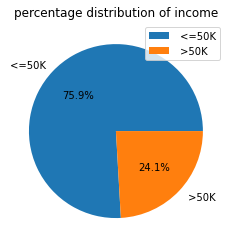

In [14]:
plt.pie(count,labels=names, autopct='%1.1f%%')
plt.title('percentage distribution of income')
plt.legend()
plt.show()

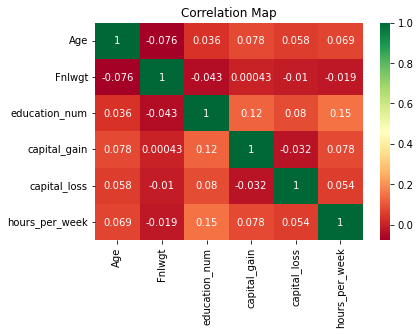

In [15]:
#Correlation Map
import seaborn as sns
corr_data=data.copy()
for feature in categorical_features:
    corr_data.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr_data.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

In [16]:
# it is not a useful feature for predicting the wage class According To correlation Map
data.drop('Fnlwgt',axis=1,inplace=True) 

Data Transformation -> Catagorical Features To Numerical Features

In [17]:
#Data Prepocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
#Frequency of Catagorical Variable
categorical_features=[feature for feature in  data.columns if  data[feature].dtype=='O' and feature!='income']
for feature in categorical_features:
    freq=data[feature].value_counts().rename_axis(feature).reset_index(name='frequency')
    print('\n')
    print(freq)



           Workclass  frequency
0            Private      22673
1   Self-emp-not-inc       2540
2          Local-gov       2093
3                  ?       1836
4          State-gov       1298
5       Self-emp-inc       1116
6        Federal-gov        960
7        Without-pay         14
8       Never-worked          7


        Education  frequency
0         HS-grad      10494
1    Some-college       7282
2       Bachelors       5353
3         Masters       1722
4       Assoc-voc       1382
5            11th       1175
6      Assoc-acdm       1067
7            10th        933
8         7th-8th        645
9     Prof-school        576
10            9th        514
11           12th        433
12      Doctorate        413
13        5th-6th        332
14        1st-4th        166
15      Preschool         50


           marital_status  frequency
0      Married-civ-spouse      14970
1           Never-married      10667
2                Divorced       4441
3               Separated       1

In [19]:
#transform country feature to be 1 if country is the United States. Otherwise is equal to 0
data['native_country']=np.where(data['native_country']==' United-States',1,0)
data.head(3)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,<=50K


In [20]:
#transform marital status and concatenate some classes to reduce distinct classes
data['marital_status']=data['marital_status'].replace({' Married-civ-spouse': 'Married', ' Never-married': 'Single',  
                                                        ' Separated':'Divorced', ' Married-spouse-absent' : 'Divorced', 
                                                         ' Divorced':'Divorced', 
                                                         ' Married-AF-spouse' :'Divorced', ' Widowed':'Widowed' })
data.head(2)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,1,<=50K


In [21]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
data['Workclass']=np.where(data['Workclass']==' Private',1,0)
data.head(3)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,<=50K
1,50,0,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,1,<=50K
2,38,1,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,<=50K


In [22]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
data['sex']=np.where(data['sex']==' Male',1,0)
data.head(3)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,<=50K
1,50,0,Bachelors,13,Married,Exec-managerial,Husband,White,1,0,0,13,1,<=50K
2,38,1,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,<=50K


In [23]:
#transform workclass feature to be 1 if the Race is White and 0 if doesn't
data['race']=np.where(data['race']==' White',1,0)
data.head(2)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0,Bachelors,13,Single,Adm-clerical,Not-in-family,1,1,2174,0,40,1,<=50K
1,50,0,Bachelors,13,Married,Exec-managerial,Husband,1,1,0,0,13,1,<=50K


In [24]:
#create ordered label for education 
education_mapping={' Preschool':0,' 1st-4th':1,' 5th-6th':2,' 7th-8th':3,' 9th':4,' 10th':5,
                   ' 11th':6,' 12th':7,' HS-grad':8,' Some-college':0,' Assoc-acdm':10,
                   ' Assoc-voc':11, ' Bachelors':12, ' Prof-school':13, ' Masters':14,' Doctorate':15
                   }
data['Education']=data['Education'].map(education_mapping)
data.head(2)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0,12,13,Single,Adm-clerical,Not-in-family,1,1,2174,0,40,1,<=50K
1,50,0,12,13,Married,Exec-managerial,Husband,1,1,0,0,13,1,<=50K


In [25]:
relationship_ordered=data.groupby(['relationship'])['income'].count().sort_values().index
relationship_ordered={k:i for i,k in enumerate(relationship_ordered,0)}
data['relationship']=data['relationship'].map(relationship_ordered)  

In [26]:
occupation_ordered=data.groupby(['occupation'])['income'].count().sort_values().index
occupation_ordered={k:i for i,k in enumerate(occupation_ordered,0)}
data['occupation']=data['occupation'].map(occupation_ordered)

In [27]:
marital_ordered=data.groupby(['marital_status'])['income'].count().sort_values().index
marital_ordered={k:i for i,k in enumerate(marital_ordered,0)}
data['marital_status']=data['marital_status'].map(marital_ordered)

In [28]:
data.head(5)

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0,12,13,2,11,4,1,1,2174,0,40,1,<=50K
1,50,0,12,13,3,12,5,1,1,0,0,13,1,<=50K
2,38,1,8,9,1,5,4,1,1,0,0,40,1,<=50K
3,53,1,6,7,3,5,5,0,1,0,0,40,1,<=50K
4,28,1,12,13,3,14,1,0,0,0,0,40,0,<=50K


<font size="4" ><span style="color:blue" >Split data into training and test data.</font></span>

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(32537, 13)
(32537,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
x.head()

,Age,Workclass,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,12,13,2,11,4,1,1,2174,0,40,1
1,50,0,12,13,3,12,5,1,1,0,0,13,1
2,38,1,8,9,1,5,4,1,1,0,0,40,1
3,53,1,6,7,3,5,5,0,1,0,0,40,1
4,28,1,12,13,3,14,1,0,0,0,0,40,0


In [32]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26029, 13)
(26029,)
(6508, 13)
(6508,)


In [34]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import xgboost as xgb
model=xgb.XGBClassifier()

In [35]:
model.fit(x_train, y_train)

[15:51:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

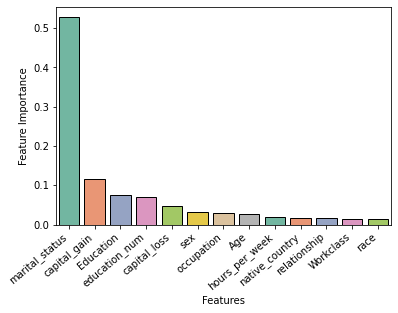

In [36]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances=feat_importances.nlargest(x_train.shape[1])
ax=sns.barplot(feat_importances.index, feat_importances.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<font size="4" ><span style="color:blue" >Apply the following models on the training dataset and generate the predicted value for the test dataset<br>
a. Decision Tree<br>
b. Random Forest Classifier<br>
c. Logistic Regression<br>
d. KNN Classifier<br>
e. SVC Classifier (with linear kernel)<br><br>
Predict the income for test data<br><br>
Compute Confusion matrix and classification report for each of these models.<br><br>
Validate the result for Precision, Recall, F1-score and Accuracy for each model based on values
from confusion_matrix and classification_report<br><br>
Generate the percentage of misclassification in each of these models.<br>
    Misclassification Rate = # incorrect predictions / # total predictions<br>
Misclassification Rate = (false positive + false negative) / (total predictions)
</font></span>

In [37]:
#import the necessary modelling algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#model selection
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [38]:
#a) DECISIONTREE CLASSIFIER
m1 = DecisionTreeClassifier()
m1.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
print('training score', m1.score(x_train, y_train))
print('testing score', m1.score(x_test, y_test))

training score 0.9750278535479657
testing score 0.823140749846343


In [40]:
#predict the income for test data
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [41]:
#confusion Matrix For DecisionTree 
cm_m1 = confusion_matrix(y_test, ypred_m1)
print(cm_m1)

[[4376  569]
 [ 582  981]]


In [66]:
#miscalssification Rate for Decision Tree
MR_m1 = (582 + 569) / (4376 + 569 + 582 + 981)
MR_m1

0.17685925015365703

In [42]:
#classification report for DecisionTree
print(classification_report(y_test, ypred_m1))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4945
        >50K       0.63      0.63      0.63      1563

    accuracy                           0.82      6508
   macro avg       0.76      0.76      0.76      6508
weighted avg       0.82      0.82      0.82      6508



<hr>

In [43]:
#b) RANDOMFOREST CLASSIFIER
m2 = RandomForestClassifier()
m2.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
print('training score', m2.score(x_train, y_train))
print('testing score', m2.score(x_test, y_test))

training score 0.9749894348611164
testing score 0.8492624462200369


In [45]:
#predict the income for test data
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [46]:
#confusion Matrix For RandomForest
cm_m2 = confusion_matrix(y_test, ypred_m2)
print(cm_m2)

[[4531  414]
 [ 567  996]]


In [68]:
#miscalssification Rate for RandomForest
MR_m2 = (567 + 414) / (4531 + 567 + 414 + 996)
MR_m2

0.15073755377996312

In [47]:
#classification report for RandomForest
print(classification_report(y_test, ypred_m2))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4945
        >50K       0.71      0.64      0.67      1563

    accuracy                           0.85      6508
   macro avg       0.80      0.78      0.79      6508
weighted avg       0.84      0.85      0.85      6508



<hr>

In [48]:
#c) KNN CLASSIFIER
m3 = KNeighborsClassifier()
m3.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
print('training score', m3.score(x_train, y_train))
print('testing score', m3.score(x_test, y_test))

training score 0.8889315763187214
testing score 0.8455746773202213


In [50]:
#predict the income for test data
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [51]:
#confusion Matrix For KNN Classifier
cm_m3 = confusion_matrix(y_test, ypred_m3)
print(cm_m3)

[[4520  425]
 [ 580  983]]


In [69]:
#miscalssification Rate for KNN
MR_m3 = (580 + 425) / (4520 + 580 + 425 + 983)
MR_m3

0.15442532267977874

In [52]:
#classification report for KNN 
print(classification_report(y_test, ypred_m3))

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4945
        >50K       0.70      0.63      0.66      1563

    accuracy                           0.85      6508
   macro avg       0.79      0.77      0.78      6508
weighted avg       0.84      0.85      0.84      6508



<b><hr></b>

In [53]:
#d) Logistic Regression
m4 = LogisticRegression()
m4.fit(x_train,y_train)

LogisticRegression()

In [54]:
print('training score', m4.score(x_train, y_train))
print('testing score', m4.score(x_test, y_test))

training score 0.8000307349494794
testing score 0.7982483097725875


In [55]:
#predict the income for test data
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [56]:
#confusion Matrix For Logistic Regression
cm_m4 = confusion_matrix(y_test, ypred_m4)
print(cm_m4)

[[4749  196]
 [1117  446]]


In [71]:
#miscalssification Rate for Logistic Regression
MR_m4 = (1117 + 196) / (4749 + 1117 + 196 + 446)
MR_m4

0.2017516902274124

In [57]:
#classification report for Logistic Regression
print(classification_report(y_test, ypred_m4))

              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      4945
        >50K       0.69      0.29      0.40      1563

    accuracy                           0.80      6508
   macro avg       0.75      0.62      0.64      6508
weighted avg       0.78      0.80      0.76      6508



<hr>

In [58]:
#e) SVM Classifier(Linear)
m5 = LinearSVC()
m5.fit(x_train,y_train)

LinearSVC()

In [59]:
print('training score', m5.score(x_train, y_train))
print('testing score', m5.score(x_test, y_test))

training score 0.8036805102001614
testing score 0.8059311616472035


In [60]:
#predict the income for test data
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [61]:
#confusion Matrix For LinearSVC
cm_m5 = confusion_matrix(y_test, ypred_m5)
print(cm_m5)

[[4727  218]
 [1045  518]]


In [72]:
#miscalssification Rate for LinearSVC
MR_m5 = (1045 + 218) / (4727 + 1045 + 218 + 518)
MR_m5

0.19406883835279656

In [62]:
#classification report for LinearSVC
print(classification_report(y_test, ypred_m5))

              precision    recall  f1-score   support

       <=50K       0.82      0.96      0.88      4945
        >50K       0.70      0.33      0.45      1563

    accuracy                           0.81      6508
   macro avg       0.76      0.64      0.67      6508
weighted avg       0.79      0.81      0.78      6508



In [63]:
#accuracy_score of decisiontree classifier 
print(accuracy_score(ypred_m1,y_test))
#accuracy_score of randomforest classifier 
print(accuracy_score(ypred_m2,y_test))
#accuracy_score of knn classifier 
print(accuracy_score(ypred_m3,y_test))
#accuracy_score of logistic regression
print(accuracy_score(ypred_m4,y_test))
#accuracy_score of SVM classifier 
print(accuracy_score(ypred_m5,y_test))

0.823140749846343
0.8492624462200369
0.8455746773202213
0.7982483097725875
0.8059311616472035


<font size="4" ><span style="color:blue" >Report the model with the best accuracy
</font></span>


In [73]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression(),LinearSVC()]
model_names=['DecisionTree','RandomForestClassifier','KNearestNeighbors','LogisticRegression','LinearSVM']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [74]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,DecisionTree,0.820836
1,RandomForestClassifier,0.843577
2,KNearestNeighbors,0.845575
3,LogisticRegression,0.798248
4,LinearSVM,0.829594


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

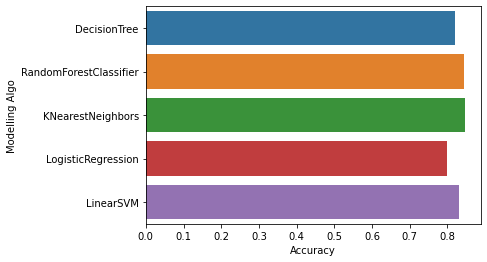

In [75]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<font size="5"><span style="color:blue"><b>conclusion:</b></span></font><span style="color:red" ><font size = "5">  randomforest and KNearestNeighbors gives an amazing accuracy for this dataset of around 84 % Accuracy .</font></span>